# Importando bibliotecas

**Name:**
**Year:**
**Month:**
**Day:**
**Hour:**
**Lat:**
**Long:**
**Status:**
**Category:**
**Wind:**
**Pressure:**
**Tropicalstorm_force_diamete:**
**hurricane_force_diameter:**

# Questões a serem respondidas?

1. Ver quais as tempestades com maior ocorrência? (nome, category, status)
2. Qual a maior velocidade do vento e pressão?
3. Qual a maior ocorrência das tempestades em um período de tempo (dia, mes, ano ) -> Desafio semanas
4. Qual a localidade que sofreu mais tempestades. (independente das variaveis?). Exemplo: A cidade que teve maior frequência de tempestades
5. Em quais localidades as tempestades (por status) ocorreram. Exemplo: Hurricane houve a maior concentração no Alabama, porém a depressão em Michigan e New York
6. Quais as localidade mais afetadas, por um determinado Tempestade. Exemplo: A Carrie ocorreu com maior frequência em New York e Florida.
7. Ano que teve mais tempestades.


## Determinar categorias por tipo de tempestade

> Como podemos determinar as categorias pelos tipos de tempestades.


 ## Importando todas as biblioteca necessárias


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Estudar bibliotecas
# FOLIUM => https://jacobtadesse.com/2019/09/28/visualizing-pandas-dataframe-lat-long-with-folium-maps/
# GEOPLOT => https://medium.com/geekculture/geospatial-visualization-with-geoplot-in-python-40b3de35ce0d

### Carregando os Datasets

> Iremos juntar todos os dados em apenas um único DataFrame
    > O arquivo storms.csv contém tempestades da época de 1950 aos dias atuais
    > Já storms_updated.csv contém dados de 1852 a 1950
Quando já finalizamos a junção dos dados, iremos realizar um sort dos valores por ano, mês e dia

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/DataScience-Storm-Analytics/master/storms_updated.csv')
df = pd.concat([df1, df2])\
        .sort_values(by=['year', 'month', 'day'], ascending=[True, True, True])\
        .reset_index(drop=True)
df

In [ ]:
df = df.drop(columns=['hour'])

# Tratamento de dados
>O tratamento de dados é algo muito importante, no qual analisamos o nosso dataset por completo, para verificar, se precisaremos realizar tratamentos, como tipo das colunas, valores nulos.


Analisaremos a integridade dos dados, ou seja, inicialmente verificaremos a quantidade de dados nulos.

In [ ]:
df.isna().sum()

Como podemos perceber no código acima `df.isna().sum()`, nos relata a quantidade de dados nulos em cada coluna. Para uma melhor visualização dos dados nulos iremos separalos em outro dataframe

In [ ]:
# Filtrando apenas as colunas com valores maiores que 0.
# TODO: Criar texto explicando o por que da analise sobre estas colunas e se há necessidade de tratar.
index_1 = list(df.loc[pd.isna(df.tropicalstorm_force_diameter), :].index)
index_2 = list(df.loc[pd.isna(df.hurricane_force_diameter), :].index)
all_nan_ind = list(set(index_1 + index_2))
len(all_nan_ind)
# half_empty_columns_df
half_empty_columns_df = df.filter(items = all_nan_ind, axis=0)
half_empty_columns_df

Quais os tipos de dados das colunas?

In [ ]:
df.dtypes

Todos os tipos dados estão corretos para a nossa analise, logo não precisaremos realizar nenhuma conversão. Vamos adicionar uma nova coluna chamada **date** para facilitar a nossa busca por datas.

In [ ]:
def format_date_field(row):
        date=datetime(row['year'], row['month'], row['day'])
        row['date'] = pd.to_datetime(date)
        return row

df = df.apply(lambda row: format_date_field(row), axis=1)
df['date']

0       1852-08-26
1       1853-09-03
2       1854-09-07
3       1854-09-08
4       1854-09-08
           ...    
30011   2021-11-06
30012   2021-11-07
30013   2021-11-07
30014   2021-11-07
30015   2021-11-07
Name: date, Length: 30016, dtype: datetime64[ns]

Como podemos ver a coluna **date** é do tipo **datetime**, o que queriamos.
Podemos agora excluir as colunas **year**, **month**, **day**

In [ ]:
df[['date', 'year', 'month', 'day']].sample(2)

,date,year,month,day
12160,1996-08-28,1996,8,28
29358,2021-07-07,2021,7,7


Iremos converter a coluna **wind** para km/h, pois está como **knots**

In [ ]:
df['wind km/h'] = df['wind'].apply(lambda x: x*1.852)
df.rename(columns={'wind':'wind kn'}, inplace=True)
df[['wind kn','wind km/h']].head()

,wind kn,wind km/h
0,100,185.20
1,130,240.76
2,110,203.72
3,100,185.20
4,100,185.20


# Analisando os dados
Começaremos a analisar os dados e responder as nossas questões

In [ ]:
df = df.drop(columns=['year', 'month', 'day'])

# Analise Exploratória

> Inicialmente iremos verificar a maior ocorrência de tempestades.
> **OBS:** É importante ressaltar que não pegaremos todas as tempestades

In [ ]:
print(f"O total de tempestades registradas foram {len(df['name'].unique().tolist())}")

O total de tempestades registradas foram 651


Como podemos ver, o total de tempestades registradas é de 651, mas nem todas elas possuem um nome de fato, umas só possuem um código. Vamos demonstrar:

In [ ]:
# Filtrando as tempestades (cujo nem todos os caracteres estão no alfabeto)
df_not_real_names = df[~df['name'].str.isalpha()]

# Filtrando as tempestades (cujo todos os caracteres estão no alfabeto)
df_real_names = df[df['name'].str.isalpha()]

# Visualizando estas separações
display(df_real_names['name'][:5],
        df_not_real_names['name'][:5])

602    Able
603    Able
604    Able
605    Able
606    Able
Name: name, dtype: object

0    AL011852
1    AL031853
2    AL031854
3    AL031854
4    AL031854
Name: name, dtype: object

In [ ]:
df_real_names.sample(20)

,name,lat,long,status,category,wind kn,pressure,tropicalstorm_force_diameter,hurricane_force_diameter,date,wind km/h
13206,Danielle,24.8,-69.4,hurricane,1,70,988,NaN,NaN,1998-08-29,129.64
8933,Josephine,20.3,-38.4,tropical depression,-1,30,1009,NaN,NaN,1990-09-26,55.56
27846,Karen,24.8,-64.0,tropical storm,0,35,1004,50.0,0.0,2019-09-26,64.82
19462,Epsilon,29.4,-37.1,hurricane,1,65,987,240.0,25.0,2005-12-07,120.38
797,Carol,30.3,-77.2,hurricane,2,85,975,NaN,NaN,1954-08-28,157.42
20112,Felix,14.2,-76.9,hurricane,5,140,937,140.0,40.0,2007-09-03,259.28
20543,Edouard,30.0,-94.8,tropical storm,0,40,999,60.0,0.0,2008-08-05,74.08
13537,Georges,25.2,-84.2,hurricane,2,90,975,NaN,NaN,1998-09-26,166.68
27253,Michael,25.6,-86.4,hurricane,3,100,961,280.0,60.0,2018-10-09,185.20
24442,Bertha,15.9,-64.1,tropical storm,0,40,1008,100.0,0.0,2014-08-02,74.08


### 1. Visualizando as tempestades com maior ocorrência
> Para visualizar as tempestades com maior ocorrência, iremos realizar outro filtro, baseado na contagem dos valores. E também voltado apenas nas tempestades com nomes reais

C:\Users\jefer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


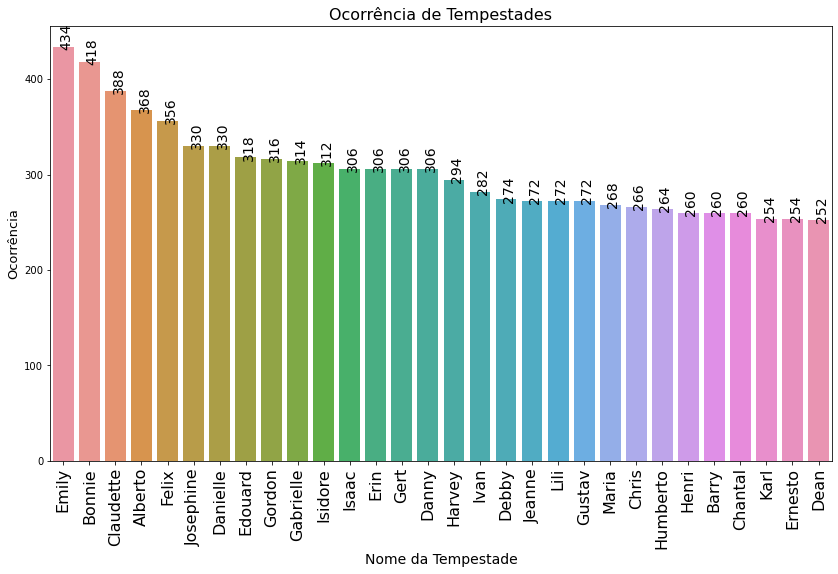

In [ ]:
# Filtering date based on "name" and count of each values
most_frequent_storms = df_real_names[df_real_names['name'].isin(
        df_real_names['name'].value_counts()[df_real_names['name'].value_counts()>250].index)]

# Order by clause, to sort the graphic plot
order_by_clause = most_frequent_storms['name'].value_counts().index

fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(most_frequent_storms['name'], order=order_by_clause, ax=ax)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()),
                    (p.get_x()+0.25, p.get_height()+0.1),
                    rotation=90,
                    fontsize=14)
plt.title("Ocorrência de Tempestades", fontsize=16)
plt.xlabel("Nome da Tempestade", fontsize=14)
plt.ylabel("Ocorrência", fontsize=13)
plt.xticks(rotation=90, fontsize=16)
plt.show()

**Com a plotagem do gráfico acima, podemos visualizar que as tempestades com maior ocorrência, foram:**

1. Emily (434 ocorrências);
2. Bonnie (418 ocorrências);
3. Claudette (388 ocorrências);
4. Alberto (368 ocorrências);
5. Felix (356 ocorrências).

In [ ]:
# df[['status', 'category']].count_values()
df.groupby(by='status')

In [ ]:
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

<AxesSubplot:xlabel='category', ylabel='count'>

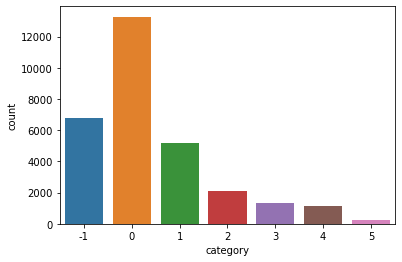

In [ ]:
sns.countplot(x='category', data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

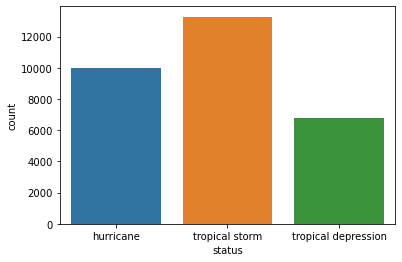

In [ ]:
sns.countplot(x='status', data=df)

In [ ]:
# Separar por tipo de status
df.status.unique()

array(['hurricane', 'tropical storm', 'tropical depression'], dtype=object)

In [ ]:
# testando teste 123 remover texto fake sqn

# Plotando informações em um gráfico


<AxesSubplot:xlabel='wind km/h', ylabel='count'>

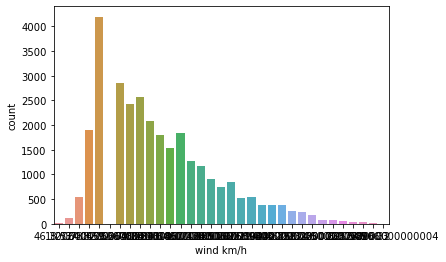

In [132]:
df[df['wind km/h'] == df['wind km/h'].max()]
#df.loc[df['wind km/h'].idxmax()]
sns.countplot(x='wind km/h', data=df)

<AxesSubplot:xlabel='pressure', ylabel='count'>

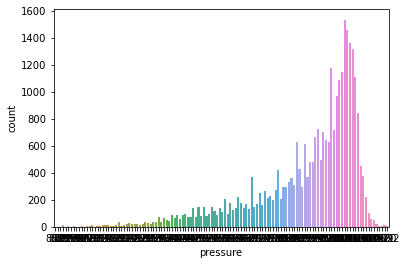

In [133]:
df[df['pressure'] == df['pressure'].max()]
sns.countplot(x='pressure', data=df)

<AxesSubplot:xlabel='count', ylabel='count'>

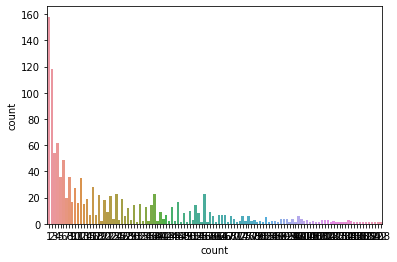

In [134]:
dfWeekYear = df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.week, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) 

sns.countplot(x='count', data=dfWeekYear)    

In [135]:
df.groupby(df['date'].apply(lambda x: "%d/%d" % (x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

,date,count
514,9/2004,507
380,8/1995,498
530,9/2020,456
508,9/1998,406
520,9/2010,392


In [136]:
df.groupby(df['date'].apply(lambda x: "%d/%d/%d" % (x.day, x.month, x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

,date,count
824,14/9/2020,40
2559,25/9/1998,34
3292,3/9/2008,34
2789,27/8/1995,34
2284,23/9/2004,32


In [137]:
df.groupby(df['date'].apply(lambda x: "%d" % (x.year))).size() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)    

#  df.groupby(df["date"].dt.year).size() \
#  .reset_index(name='count') \
#  .sort_values(['count'], ascending=False) \
#  .head(5)

,date,count
127,1995,1304
152,2020,1215
137,2005,1175
144,2012,932
136,2004,896


# Plotando informações em um Mapa


In [137]:
!pip install folium
!pip install folium pandas
# !pip install cartopy
# !pip install geoplot

In [137]:
# Inicialmente criaremos uma função simples para retornar o mapa de heatmap, já para visualização.
import folium
from folium import plugins
def plot_folium_heatmap_map(df:pd.DataFrame,
                            zoom_start:int = 3,
                            radius:int = 25):
    """
    Create a Heatmap visualization for the Dataframe already filtered
    :param df: DataFrame filtered with the data to plot
    :param radius: (int)
    :param zoom_start: (int) innitial zoom value to the map visualization
    :return: The heatmap visualization
    """
    lat = df['lat'].mean()
    long = df['long'].mean()
    localization = df[['lat', 'long']].values

    map = folium.Map([lat, long],tiles='StamenToner', zoom_start=zoom_start)
    folium.plugins.HeatMap(localization).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
    folium.LayerControl().add_to(map)
    # map.add_child(plugins.HeatMap(localization, radius=radius))
    return map

In [140]:
map_real_names = plot_folium_heatmap_map(df_real_names, radius=25)
map_real_names

### Vamos plotar o ano em que tivemos mais tempestades

> Para isso vamos verificar qual a maior frequência absoluta do ano.


In [138]:
# Podemos visualizar o ano mais frequente de uma maneira bem simples.
print(f"O ano mais frequente encontrado no dataset foi: {most_frequent_storms.date.dt.year.mode()[0]}")

O ano mais frequente encontrado no dataset foi: 2004


In [139]:
most_frequent_year = most_frequent_storms.loc[most_frequent_storms.date.dt.year == 2004]
plot_folium_heatmap_map(most_frequent_year, radius=15)